Connect Google Drive for accessing data files

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24"

In [ ]:
#changing the working directory
%cd /content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24/

/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24


Import necessary libraries

In [ ]:
import IPython.display as ipd #Allows Audio files to be played directly in the notebook
import librosa #library we will to analyze sounds
import librosa.display #library module which helps visualize the waves

In [ ]:
import os
import glob
import numpy as np
import pandas as pd
import random

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

In [ ]:
print(os.getcwd())

/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24


Get paths of all audio files into a list

In [ ]:
audios = glob.glob(os.path.join("Actor_*/*.wav"), recursive=True)

print(f"Total Audio Files : {len(audios)}")

Total Audio Files : 1440


In [ ]:
audios[:5] #Contains path of all audios

['Actor_06/03-01-01-01-01-01-06.wav',
 'Actor_06/03-01-01-01-01-02-06.wav',
 'Actor_06/03-01-01-01-02-02-06.wav',
 'Actor_06/03-01-01-01-02-01-06.wav',
 'Actor_06/03-01-06-02-02-01-06.wav']

Find the durations

In [ ]:
durations = [ librosa.get_duration(filename=p) for p in audios ]

stats = {
    'mean': np.mean(durations),
    'max': np.max(durations),
    'min': np.min(durations),
}

print(stats)

{'mean': 3.7006648148148145, 'max': 5.2719375, 'min': 2.9362708333333334}


Random audio without specific sample rate and with sample rate of 100

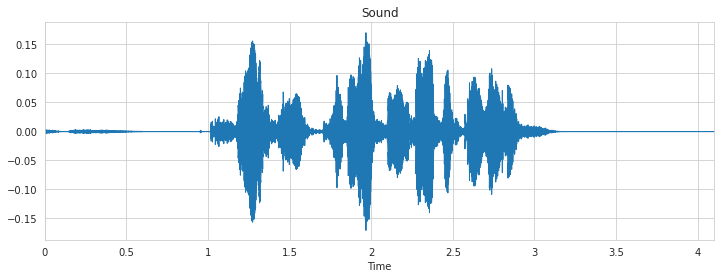

In [ ]:
plt.figure(figsize=(12,4))

play_audio = random.choice(audios)
data, sample_rate = librosa.load(play_audio)
librosa.display.waveplot(data)
plt.title("Sound")
ipd.Audio(play_audio)

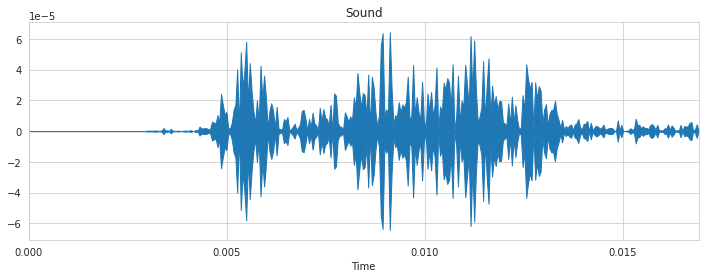

In [ ]:
plt.figure(figsize=(12,4))
play_audio = random.choice(audios)
data, sample_rate = librosa.load(play_audio, sr=100)
librosa.display.waveplot(data)
plt.title("Sound")
ipd.Audio(play_audio)

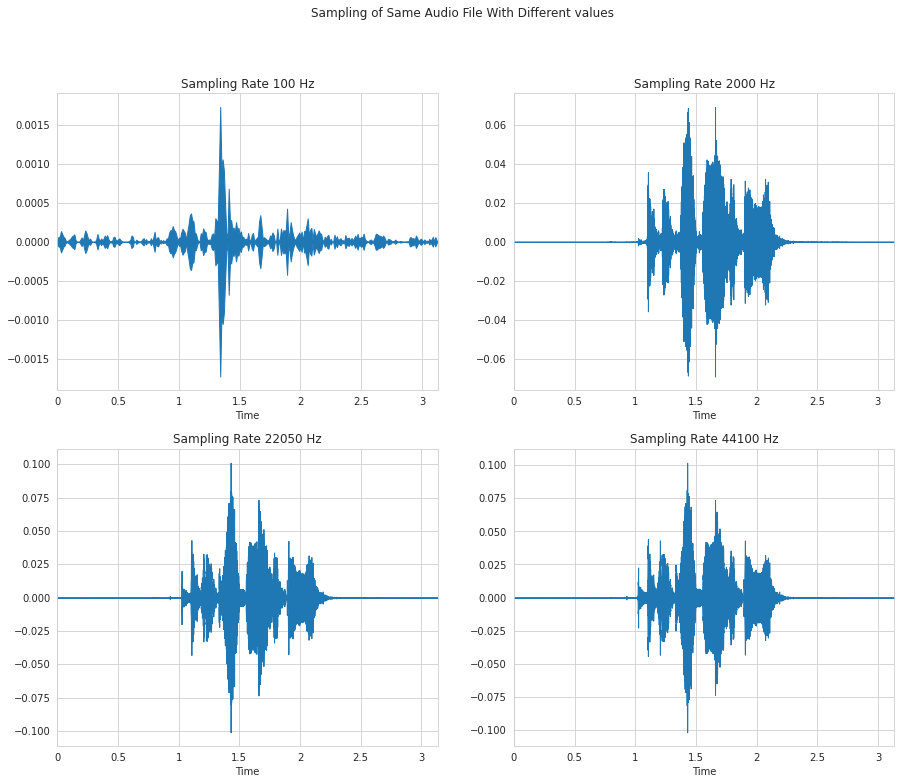

In [ ]:
fig, axs = plt.subplots(2,2, figsize=(15,12))
fig.suptitle("Sampling of Same Audio File With Different values")
axs = np.reshape(axs,-1)
play_audio = random.choice(audios)
srs = [100, 2000, 22050, 44100]
for ax,sr in zip(axs,srs):
  try:
    data, sample_rate = librosa.load(play_audio, sr=sr)
    librosa.display.waveplot(data, sr=sample_rate, ax=ax)
    ax.set_title(f"Sampling Rate {sr} Hz")
  except:
    print("Run Again Some Unknown Error")

ipd.Audio(play_audio)

In [ ]:
import pandas as pd
import numpy as np
import librosa
import librosa.display
import glob
import IPython.display as ipd
import random
%pylab inline

import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['random']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [ ]:
#DataFlair - Emotions in the RAVDESS dataset
emotions={
  '01':'neutral',
  '02':'calm',
  '03':'happy',
  '04':'sad',
  '05':'angry',
  '06':'fearful',
  '07':'disgust',
  '08':'surprised'
}

In [ ]:
emotion=[emotions[i.split("-")[2]] for i in audios] 

In [ ]:
emotionID=[i.split("-")[2] for i in audios]

In [ ]:
emotionID[:5]

['01', '01', '01', '01', '06']

In [ ]:
data_tuples = list(zip(audios,emotion,emotionID))
data_tuples[:5]

[('Actor_06/03-01-01-01-01-01-06.wav', 'neutral', '01'),
 ('Actor_06/03-01-01-01-01-02-06.wav', 'neutral', '01'),
 ('Actor_06/03-01-01-01-02-02-06.wav', 'neutral', '01'),
 ('Actor_06/03-01-01-01-02-01-06.wav', 'neutral', '01'),
 ('Actor_06/03-01-06-02-02-01-06.wav', 'fearful', '06')]

In [ ]:
metadata = pd.DataFrame(data_tuples, columns=['FileName','Emotion','EmotionID'])

In [ ]:
unique_audios = metadata.groupby(['Emotion']).apply(lambda sub_df : sub_df.sample()).reset_index(drop = True)
unique_audios

,FileName,Emotion,EmotionID
0,Actor_08/03-01-05-01-01-01-08.wav,angry,05
1,Actor_06/03-01-02-02-01-01-06.wav,calm,02
2,Actor_10/03-01-07-01-01-01-10.wav,disgust,07
3,Actor_22/03-01-06-02-01-01-22.wav,fearful,06
4,Actor_10/03-01-03-02-02-02-10.wav,happy,03
5,Actor_21/03-01-01-01-02-02-21.wav,neutral,01
6,Actor_21/03-01-04-02-02-01-21.wav,sad,04
7,Actor_06/03-01-08-01-01-02-06.wav,surprised,08


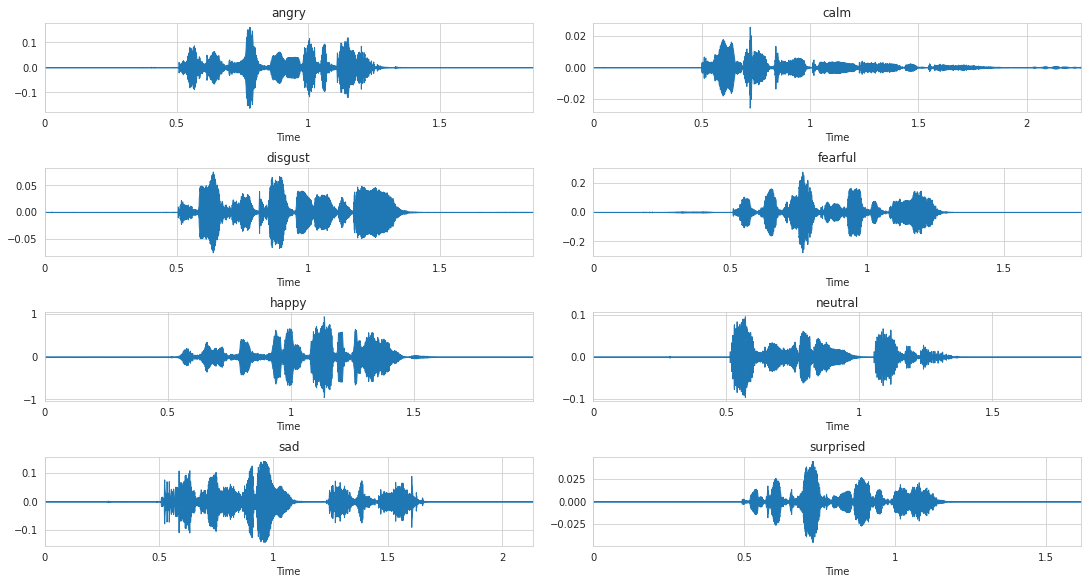

In [ ]:
fig, axs = plt.subplots(4,2,figsize=(15,8),constrained_layout=True)
axs = np.reshape(axs, -1)

for (index,row),ax in zip(unique_audios.iterrows(),axs):
  ax.set_title(row.values[1])
  data, sr = librosa.load(f"/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24/" + row.values[0])
  _ = librosa.display.waveplot(data, sr=sample_rate, ax=ax)


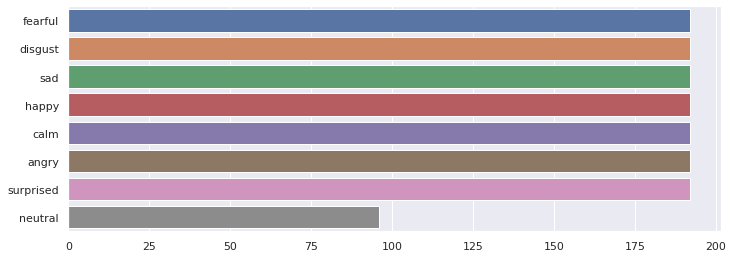

In [ ]:
instance_counts = metadata['Emotion'].value_counts()
sns.set(rc={'figure.figsize':(11.7,4.14)})
sns.barplot(x=instance_counts.values, y=instance_counts.index, orient='h')

In [ ]:
import pandas as pd
import numpy as np
import os
import struct
from scipy.io import wavfile as wav
import matplotlib.pyplot as plt
import IPython.display as ipd

def path_class(filename):
    excerpt = metadata[metadata['FileName'] == filename]
    path_name = os.path.join('/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24/', filename)
    return path_name, excerpt['Emotion'].values[0]
  
def wav_fmt_parser(file_name):
    full_path, _ = path_class(file_name)
    wave_file = open(full_path,"rb")
    riff_fmt = wave_file.read(36)
    n_channels_string = riff_fmt[22:24]
    n_channels = struct.unpack("H",n_channels_string)[0]
    s_rate_string = riff_fmt[24:28]
    s_rate = struct.unpack("I",s_rate_string)[0]
    bit_depth_string = riff_fmt[-2:]
    bit_depth = struct.unpack("H",bit_depth_string)[0]
    return (n_channels,s_rate,bit_depth)

In [ ]:
# faster approach
wav_fmt_data = [wav_fmt_parser(i) for i in metadata.FileName]
metadata[['n_channels','sampling_rate','bit_depth']] = pd.DataFrame(wav_fmt_data)
metadata.head()

,FileName,Emotion,EmotionID,n_channels,sampling_rate,bit_depth
0,Actor_06/03-01-01-01-01-01-06.wav,neutral,01,1,48000,16
1,Actor_06/03-01-01-01-01-02-06.wav,neutral,01,1,48000,16
2,Actor_06/03-01-01-01-02-02-06.wav,neutral,01,1,48000,16
3,Actor_06/03-01-01-01-02-01-06.wav,neutral,01,1,48000,16
4,Actor_06/03-01-06-02-02-01-06.wav,fearful,06,1,48000,16


In [ ]:
metadata.sampling_rate.value_counts()

48000    1440
Name: sampling_rate, dtype: int64

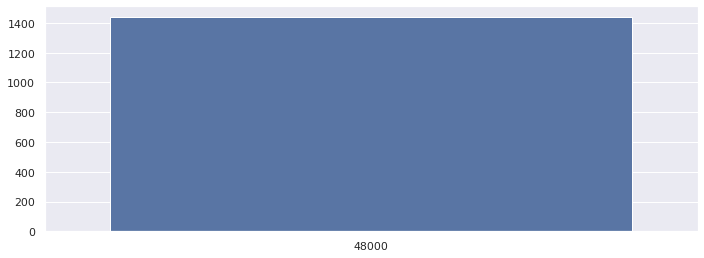

In [ ]:
channels_data = metadata['sampling_rate'].value_counts()
sns.barplot(x=channels_data.index, y=channels_data.values)

In [ ]:
metadata.n_channels.value_counts()

1    1440
Name: n_channels, dtype: int64

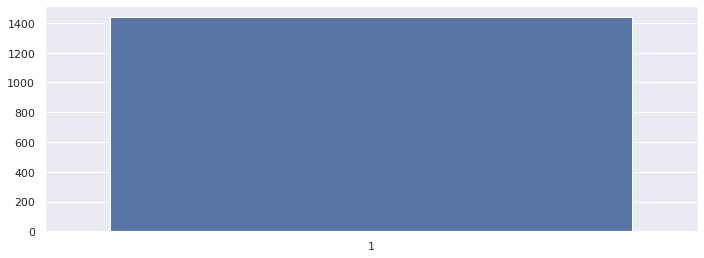

In [ ]:
# Number of channels in audio files
channels_data = metadata['n_channels'].value_counts()
sns.barplot(x=channels_data.index, y=channels_data.values)

In [ ]:
metadata.bit_depth.value_counts()

16    1440
Name: bit_depth, dtype: int64

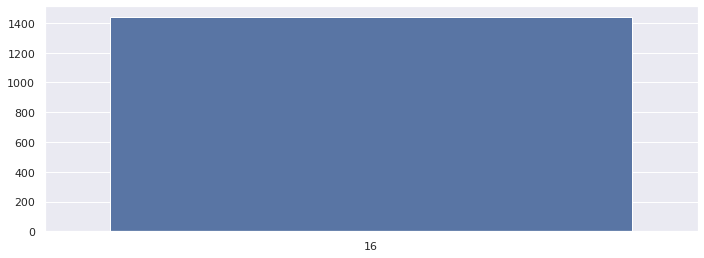

In [ ]:
channels_data = metadata['bit_depth'].value_counts()
sns.barplot(x=channels_data.index, y=channels_data.values)

In [ ]:
metadata[metadata.FileName == 'Actor_06/03-01-06-02-02-01-06.wav']

,FileName,Emotion,EmotionID,n_channels,sampling_rate,bit_depth
4,Actor_06/03-01-06-02-02-01-06.wav,fearful,06,1,48000,16


In [ ]:
import librosa
fullpath,_ = path_class('Actor_06/03-01-06-02-02-01-06.wav')
librosa_load, librosa_sampling_rate = librosa.load(fullpath,sr=24000)
scipy_sampling_rate, scipy_load = wav.read(fullpath)
print('original sample rate:',scipy_sampling_rate)
print('converted sample rate:',librosa_sampling_rate)
print('\n')
print('original wav file min~max range:',np.min(scipy_load),'~',np.max(scipy_load))
print('converted wav file min~max range:',np.min(librosa_load),'~',np.max(librosa_load))

original sample rate: 48000
converted sample rate: 24000


original wav file min~max range: -14767 ~ 17196
converted wav file min~max range: -0.44878516 ~ 0.52376914


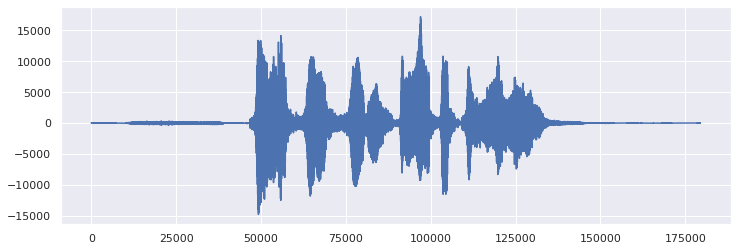

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(scipy_load)

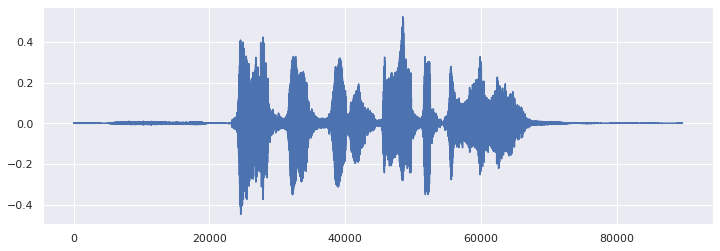

In [ ]:
plt.figure(figsize=(12, 4))
plt.plot(librosa_load)

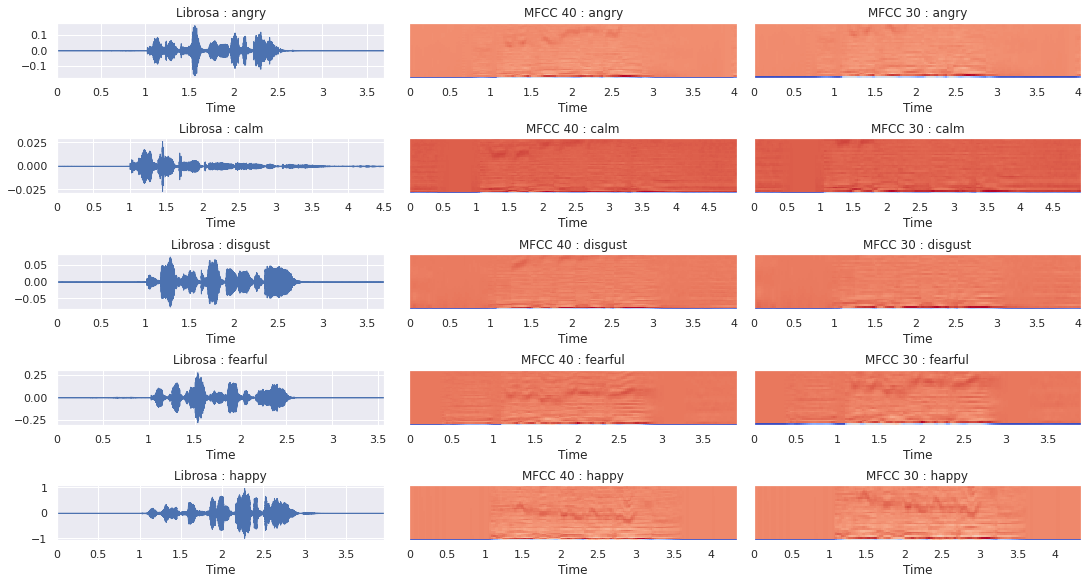

In [ ]:
unique_audios_5 = unique_audios.head()
fig, axs = plt.subplots(5,3,figsize=(15,8),constrained_layout=True)

for (index,row),ax in zip(unique_audios_5.iterrows(),axs):
  
  file_path = f"/content/gdrive/Shareddrives/DATA255/audio_speech_actors_01-24/" + row.values[0]
  ax[0].set_title(f"Librosa : {row.values[1]}")
  data, sr = librosa.load(file_path,sr=24000)
  _ = librosa.display.waveplot(data, sr=sr, ax=ax[0])

  ax[1].set_title(f"MFCC 40 : {row.values[1]}")
  mfccs = librosa.feature.mfcc(data, n_mfcc= 40)
  librosa.display.specshow(mfccs, x_axis='time', ax=ax[1])

  ax[2].set_title(f"MFCC 30 : {row.values[1]}")
  mfccs = librosa.feature.mfcc(data, n_mfcc= 30)
  librosa.display.specshow(mfccs, x_axis='time', ax=ax[2])

In [ ]:
  metadata.head()

,FileName,Emotion,EmotionID,n_channels,sampling_rate,bit_depth
0,Actor_06/03-01-01-01-01-01-06.wav,neutral,01,1,48000,16
1,Actor_06/03-01-01-01-01-02-06.wav,neutral,01,1,48000,16
2,Actor_06/03-01-01-01-02-02-06.wav,neutral,01,1,48000,16
3,Actor_06/03-01-01-01-02-01-06.wav,neutral,01,1,48000,16
4,Actor_06/03-01-06-02-02-01-06.wav,fearful,06,1,48000,16


In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, sr=24000, offset=0.5)
    #result=np.array([])
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    result=np.array((mfcc))
    stft=np.abs(librosa.stft(y))
    chroma=np.mean(librosa.feature.chroma_stft(S=stft, sr=sr).T,axis=0)
    result=np.hstack((result, chroma))
    mel=np.mean(librosa.feature.melspectrogram(y, sr=sr).T,axis=0)
    result=np.hstack((result, mel))
    return result

In [ ]:
temp=extract_mfcc(metadata['FileName'][0])

In [ ]:
temp.shape

(180,)

In [ ]:
X_mfcc = metadata['FileName'].apply(lambda x: extract_mfcc(x))

In [ ]:
X_mfcc

0       [-708.77246, 62.474735, -18.780773, 7.5276303,...
1       [-672.72253, 65.900475, -19.960842, 11.433542,...
2       [-680.83453, 65.50324, -16.790174, 8.760841, 1...
3       [-675.2928, 61.35578, -12.5609, 9.707158, 2.13...
4       [-380.5033, 15.811806, -50.53882, -16.69942, -...
                              ...                        
1435    [-466.8473, 41.10189, -26.28804, 0.81079036, -...
1436    [-562.29956, 39.739544, -19.807922, 3.4826357,...
1437    [-633.6816, 48.478687, -18.499634, 0.9333018, ...
1438    [-652.8777, 46.163013, -17.171545, 4.615615, -...
1439    [-664.22906, 42.32414, -11.495617, 2.4228237, ...
Name: FileName, Length: 1440, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(1440, 180)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(metadata[['Emotion']])

In [ ]:
y = y.toarray()

In [ ]:
y.shape

(1440, 8)

In [ ]:
import librosa
import soundfile
import os, glob, pickle
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(np.array(X), y, test_size=0.25, random_state=9)

In [ ]:
#Initialize the Multi Layer Perceptron Classifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,), learning_rate='adaptive', max_iter=500)

In [ ]:
# Train the model
model.fit(x_train,y_train)

MLPClassifier(alpha=0.01, batch_size=256, hidden_layer_sizes=(300,),
              learning_rate='adaptive', max_iter=500)

In [ ]:
# Predict for the test set
y_pred=model.predict(x_test)

In [ ]:
# Calculate the accuracy of our model
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)

# Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 30.83%
